In [1]:
# we obtain these dataframes from gymshark_data_cleaning.ipynb 

import pandas as pd
path = "/Users/anikamisra/Desktop/personal-projects/pink-tax" # your path here 
womens_df = pd.read_csv(f'{path}/gymshark/womens_df_clean.csv')
mens_df = pd.read_csv(f'{path}/gymshark/mens_df_clean.csv')

In [2]:
print("Womens specific categories: ", womens_df['Specific Category'].unique())
print("\nMens specific categories: ", mens_df['Specific Category'].unique())

Womens specific categories:  ['other' 'Leggings' 'Socks 3-pack' 'Socks 5-pack' 'Crew' 'Shorts' 'Bra'
 'Bag' 'Other top' 'T-shirt' 'Sweatpants' 'Crop top' 'Tank']

Mens specific categories:  ['T-shirt' 'Tank' 'Shorts' 'Sweatpants' 'Hoodie' 'Underwear' 'Crew']


In [3]:
# need numerical values  for analysis  
womens_df['Price'] = womens_df['Price'].str.replace('$', '')
womens_df['Price'] = womens_df['Price'].astype(float)
mens_df['Price'] = mens_df['Price'].str.replace('$', '')
mens_df['Price'] = mens_df['Price'].astype(float)

In [5]:
# we need to know which direct comparisons we can make! e.g. since men's clothing doesn't contain bras we can't compare that.  

overlap_categories = set(womens_df['Specific Category'].unique()) & set(mens_df['Specific Category'].unique())
print("These are the categories that overlap between womens and mens clothing, that we can directly compare: ")
print(overlap_categories)

These are the categories that overlap between womens and mens clothing, that we can directly compare: 
{'Sweatpants', 'Shorts', 'T-shirt', 'Crew', 'Tank'}


In [6]:
# make the final dataframe 

results_df = pd.DataFrame(columns = ['Specific Category', 
                                     'Womens avg price', 
                                     'Mens avg price',
                                    '% difference (women vs men)', 
                                    'No. of items (women)', 
                                    'No. of items (men)'])

for category in overlap_categories: 
    w_item = womens_df[womens_df['Specific Category'] == category]
    m_item = mens_df[mens_df['Specific Category'] == category]
    w_avg_price = w_item['Price'].mean()
    m_avg_price = m_item['Price'].mean()
    no_of_items_w = w_item.shape[0]
    no_of_items_m = m_item.shape[0]

    percent_difference = str((abs(w_avg_price - m_avg_price) / m_avg_price * 100).round(2))
    more_or_less = "more" if w_avg_price > m_avg_price else "less"
    
    new_data = pd.DataFrame({
        'Specific Category': [category],
        'Womens avg price': [w_avg_price],
        'Mens avg price': [m_avg_price],
        '% difference (women vs men)': [f"{percent_difference}% {more_or_less}"],
        'No. of items (women)': [no_of_items_w],
        'No. of items (men)': [no_of_items_m]
    })

    results_df = pd.concat([results_df, new_data], ignore_index=True)

results_df['Womens avg price'] = results_df['Womens avg price'].round(2)
results_df['Mens avg price'] = results_df['Mens avg price'].round(2)

results_df


,Specific Category,Womens avg price,Mens avg price,% difference (women vs men),No. of items (women),No. of items (men)
0,Sweatpants,42.67,40.00,6.67% more,48,64
1,Shorts,33.98,29.55,15.0% more,176,384
2,T-shirt,36.80,28.53,29.0% more,80,304
3,Crew,42.00,30.00,40.0% more,16,16
4,Tank,36.00,24.00,50.0% more,32,96


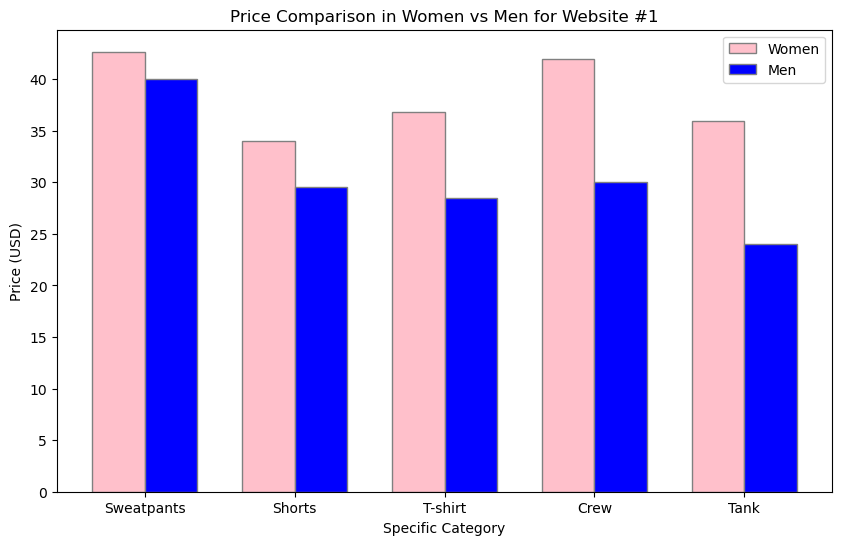

In [7]:
import matplotlib.pyplot as plt
import numpy as np

categories = results_df['Specific Category'].values
womens_prices = results_df['Womens avg price'].values
mens_prices = results_df['Mens avg price'].values

bar_width = 0.35
womens_positions = np.arange(len(categories))
mens_positions = [x + bar_width for x in womens_positions]

plt.figure(figsize=(10, 6))
plt.bar(womens_positions, womens_prices, color='pink', width=bar_width, edgecolor='grey', label='Women')
plt.bar(mens_positions, mens_prices, color='blue', width=bar_width, edgecolor='grey', label='Men')

plt.title('Price Comparison in Women vs Men for Website #1')
plt.xlabel('Specific Category')
plt.ylabel('Price (USD)')

plt.xticks([r + bar_width / 2 for r in range(len(womens_prices))], categories)

plt.legend()
plt.show()